In [1]:
from math import radians, cos, sin, asin, sqrt, atan2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch
import shapefile
from matplotlib.lines import Line2D
import warnings
import matplotlib.colors as colors
import numpy as np
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)

In [10]:
roads_path = "C:\\Users\\lilyx\\DataViz\\Data\\Legacy\\NYS_Boundaries\\Cities_Towns.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')
roads.head(1)

NAME MUNI_TYPE  MUNITYCODE     COUNTY GNIS_ID   FIPS_CODE    SWIS  \
0  Adams      town           2  Jefferson  978655  3604500210  222000   

   POP1990  POP2000  POP2010  POP2020 DOS_LL DOSLL_DATE MAP_SYMBOL  \
0     4977     4782     5143        0   None       None          T   

   CALC_SQ_MI     DATEMOD    Shape_Leng    Shape_Area  \
0   42.361757  2018-11-06  41971.838963  1.097164e+08   

                                            geometry  
0  POLYGON ((419711.937 4860894.762, 420725.148 4...

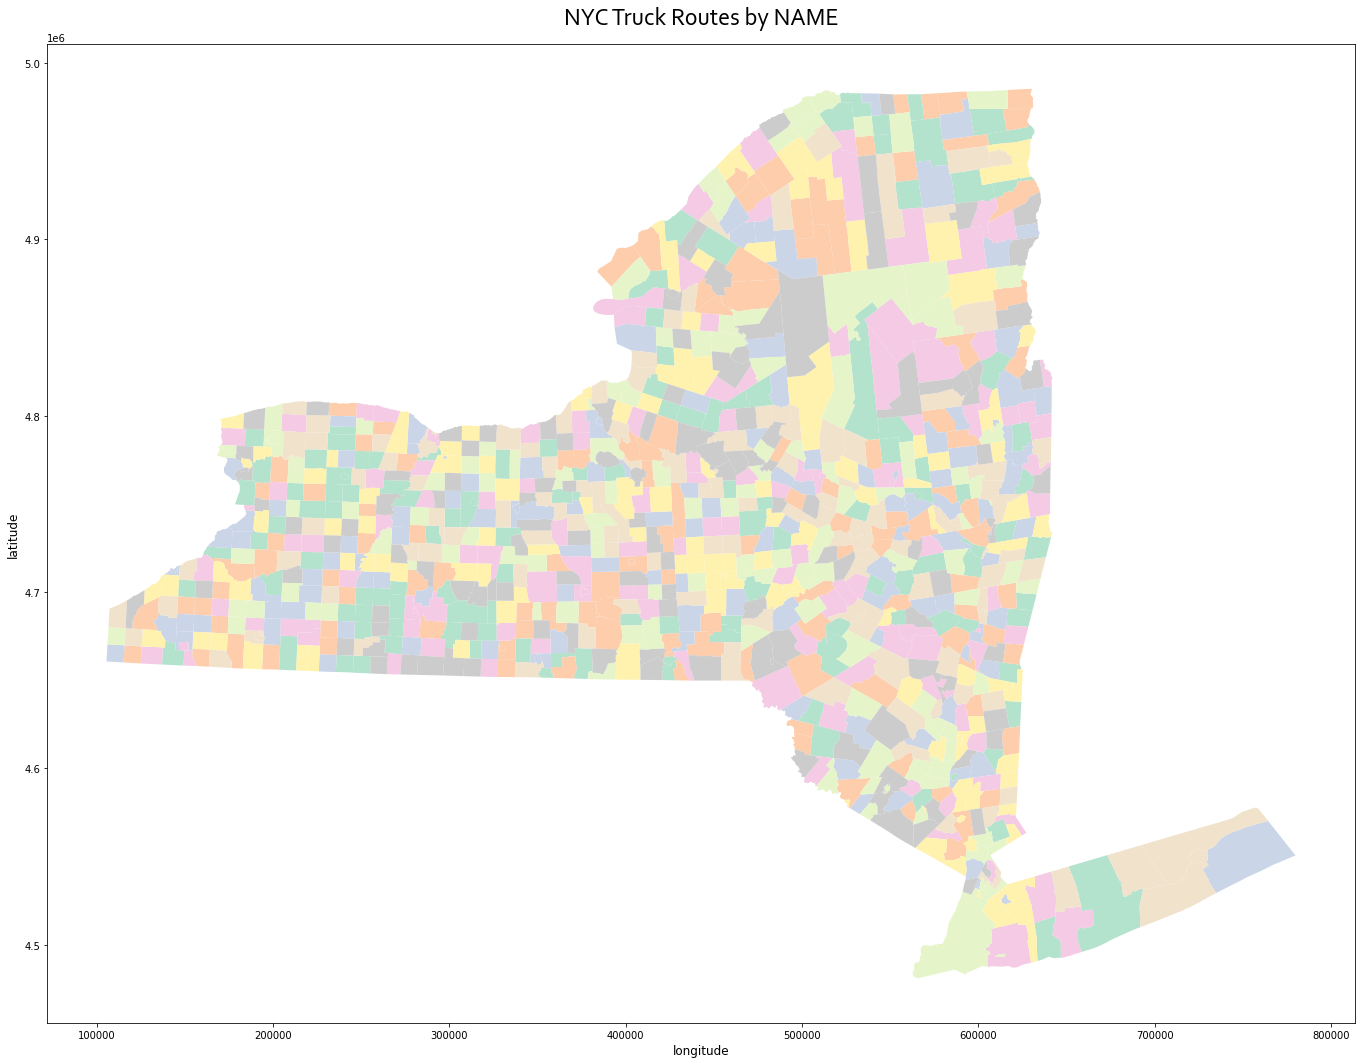

In [14]:
variable = 'NAME'
roads.plot(column= variable,figsize=(24, 18), cmap = 'Pastel2', legend=False)
plt.title(f"NYC Truck Routes by {variable}", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

In [16]:
shp_path = "C:\\Users\\lilyx\\DataViz\\Data\\Legacy\\NYS_Boundaries\\Cities_Towns.shp"
shpNTA = gpd.read_file(shp_path)
# shp_shape = shp.to_crs({'init': 'epsg:4326'})
# shp_shape.boundary.plot()
shpNTA.head(1)

NAME MUNI_TYPE  MUNITYCODE     COUNTY GNIS_ID   FIPS_CODE    SWIS  \
0  Adams      town           2  Jefferson  978655  3604500210  222000   

   POP1990  POP2000  POP2010  POP2020 DOS_LL DOSLL_DATE MAP_SYMBOL  \
0     4977     4782     5143        0   None       None          T   

   CALC_SQ_MI     DATEMOD    Shape_Leng    Shape_Area  \
0   42.361757  2018-11-06  41971.838963  1.097164e+08   

                                            geometry  
0  POLYGON ((419711.937 4860894.762, 420725.148 4...

<Figure size 432x288 with 0 Axes>

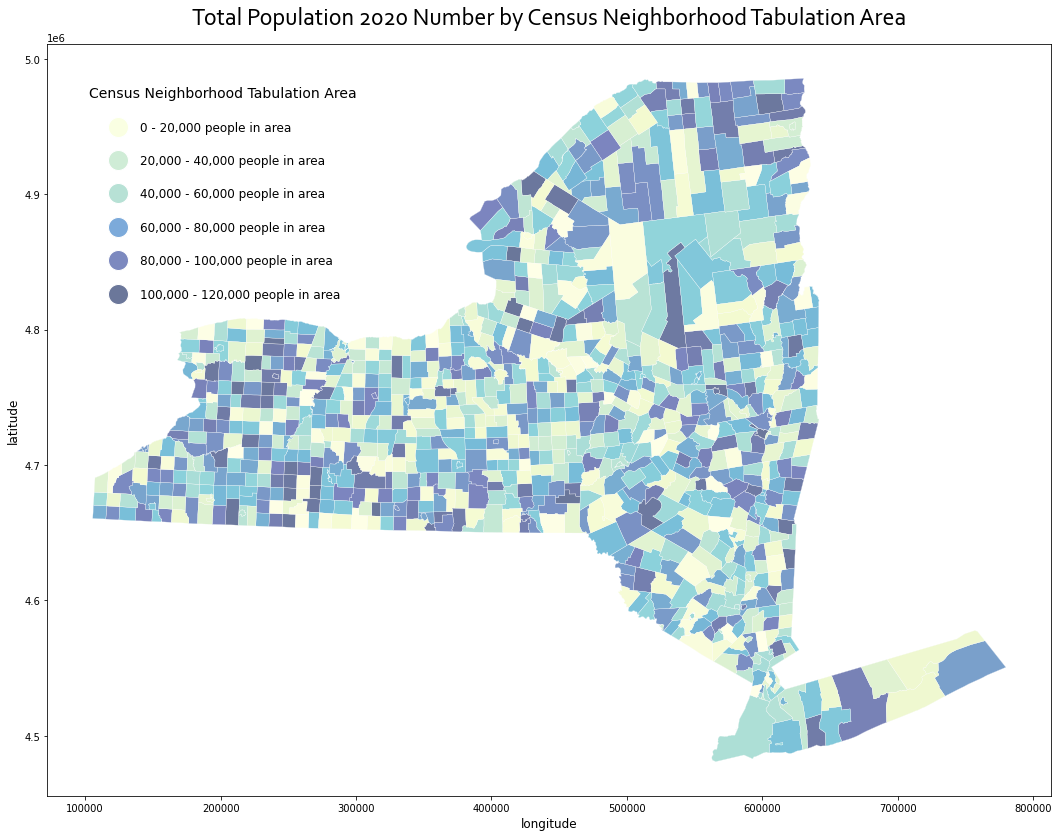

In [17]:
sf=shapefile.Reader("C:\\Users\\lilyx\\DataViz\\Data\\Legacy\\NYS_Boundaries\\Cities_Towns.shp")

fig = plt.figure() 
ax = shpNTA.plot(figsize=(18, 16), color='#EFEFEF', edgecolor='#ffffff', cmap='YlGnBu_r', column='NAME',linewidth=0.2,label= "x",legend=True, legend_kwds={"frameon": False, "title": "Plowing Priority", "loc":"upper left", "title_fontsize":20,"mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14},"bbox_to_anchor":(-0.5,.3,2,4)});

for poly in sf.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='#ffffff', ec='#ffffff', alpha=0.4, linewidth=0.2))

ax.axis('scaled')
plt.title("Total Population 2020 Number by Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
line1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#FAFFE2",markersize=20)
line2 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#CFECD6",markersize=20)
line3 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#B7E1D5",markersize=20)
line4 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#7CAADA",markersize=20)
line5 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#7C89BF",markersize=20)
line6 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#6B779A",markersize=20)
ax.legend((line1,line2,line3,line4,line5,line6),("0 - 20,000 people in area","20,000 - 40,000 people in area","40,000 - 60,000 people in area","60,000 - 80,000 people in area","80,000 - 100,000 people in area","100,000 - 120,000 people in area"),frameon=False, loc='upper left', title = "Census Neighborhood Tabulation Area", title_fontsize=14, labelspacing=1.7, fontsize=12,borderpad=3);
plt.show();

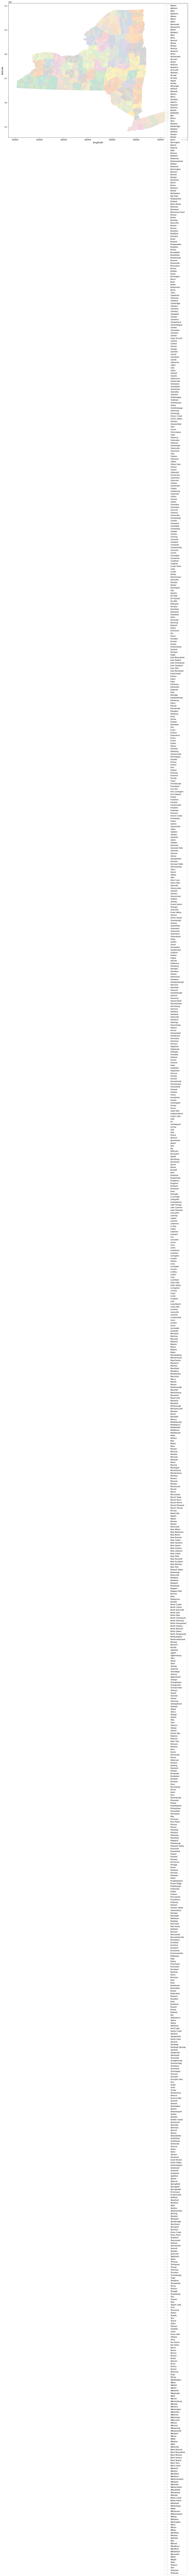

In [22]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize = (18,16)) 
shpNTA.plot(ax=ax, cmap='Pastel2', column='COUNTY', legend=False, alpha=0.8,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
roads.plot(ax=ax, column=variable, cmap='Pastel2', legend=True, alpha=0.3)
# plt.title("Snow Plowing Priority vs. Population based on 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
# line1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#FAFFE2",markersize=20)
# line2 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#CFECD6",markersize=20)
# line3 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#B7E1D5",markersize=20)
# line4 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#7CAADA",markersize=20)
# line5 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#7C89BF",markersize=20)
# line6 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#6B779A",markersize=20)
# line7 = Line2D(range(1), range(1), color="#e134eb", marker='_',markersize=20)
# line8 = Line2D(range(1), range(1), color="#ffb8f1", marker='_',markersize=20)
# line9 = Line2D(range(1), range(1), color="#ffd738", marker='_',markersize=20)
# ax.legend((line1,line2,line3,line4,line5,line6,line7,line8,line9),("0 - 20,000 people in area","20,000 - 40,000 people in area","40,000 - 60,000 people in area","60,000 - 80,000 people in area","80,000 - 100,000 people in area","100,000 - 120,000 people in area","1st Priority Snow Plowing Roads","2st Priority Snow Plowing Roads","Not Serviced by the DSNY"),frameon=False, loc='upper left', title = "Population by 2010 Census Neighborhood Tabulation Area", title_fontsize=14, labelspacing=1.7, fontsize=12,borderpad=3);
plt.savefig('NYS_Counties_and_Townss.png',transparent=True)
plt.show()

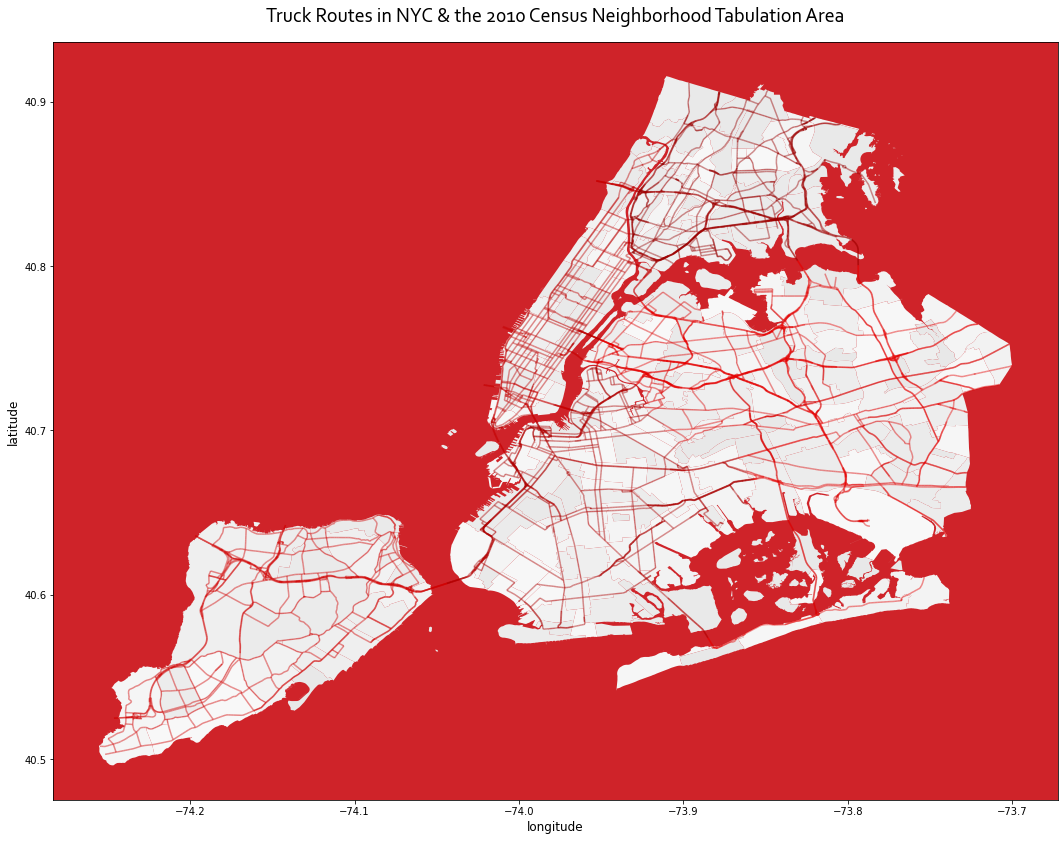

In [28]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('seismic')
red_cmap = truncate_colormap(cmap, 0.8, 0.95)

cmapb = plt.get_cmap('gist_yarg')
grays = truncate_colormap(cmapb, 0.03, 0.09)
# plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (18,16)) 
ax.set_facecolor("#cf2329")
shpNTA.plot(ax=ax, cmap=grays, column='ntaname', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
roads.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
line1 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#FAFFE2",markersize=20)
line2 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#CFECD6",markersize=20)
line3 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#B7E1D5",markersize=20)
line4 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#7CAADA",markersize=20)
line5 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="#7C89BF",markersize=20)
line6 = Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#6B779A",markersize=20)
line7 = Line2D(range(1), range(1), color="#e134eb", marker='_',markersize=20)
line8 = Line2D(range(1), range(1), color="#ffb8f1", marker='_',markersize=20)
line9 = Line2D(range(1), range(1), color="#ffd738", marker='_',markersize=20)
# ax.legend((line1,line2,line3,line4,line5,line6,line7,line8,line9),("0 - 20,000 people in area","20,000 - 40,000 people in area","40,000 - 60,000 people in area","60,000 - 80,000 people in area","80,000 - 100,000 people in area","100,000 - 120,000 people in area","1st Priority Snow Plowing Roads","2st Priority Snow Plowing Roads","Not Serviced by the DSNY"),frameon=False, loc='upper left', title = "Population by 2010 Census Neighborhood Tabulation Area", title_fontsize=14, labelspacing=1.7, fontsize=12,borderpad=3);

plt.savefig('Truck_Routes_NYC.png', dpi=500)
# fig.savefig('Truck_Routes_NYC.svg', format='svg', dpi=300)
# plt.savefig('Truck_Routes_NYC.eps', format='eps')
plt.show()

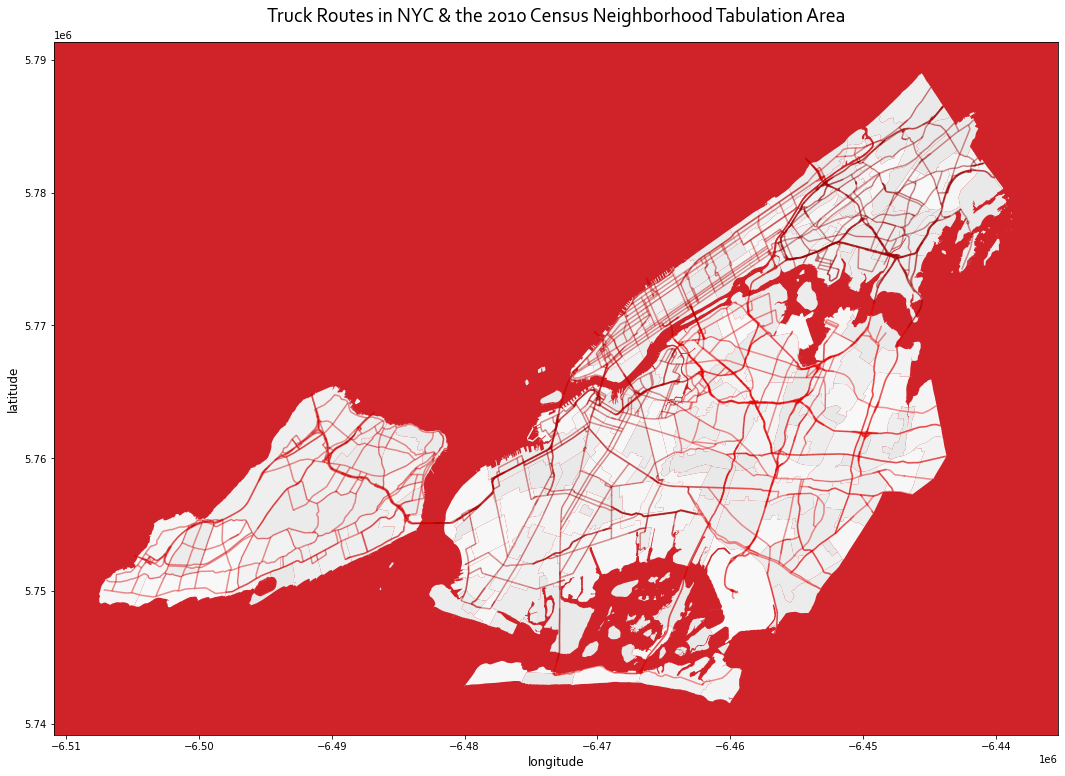

In [29]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(figsize = (18,16)) 
ax.set_facecolor("#cf2329")

# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = shpNTA.to_crs(crs_proj4)
ddr = roads.to_crs(crs_proj4)

df_ae.plot(ax=ax, cmap=grays, column='ntaname', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
ddr.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

plt.savefig('Truck_Routes_NYC_project4.png', dpi=500)
plt.show()

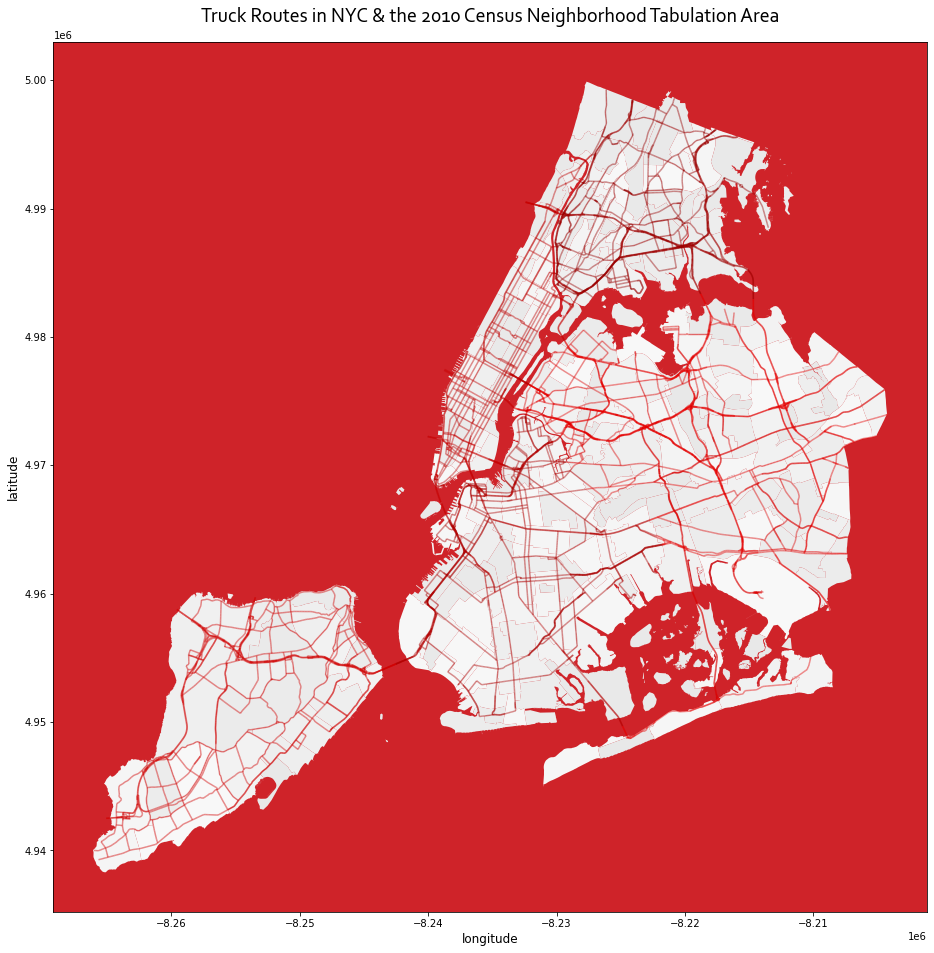

In [30]:
fig, ax = plt.subplots(figsize = (18,16)) 
ax.set_facecolor("#cf2329")

# Define the CartoPy CRS object.
crs_epsg = ccrs.epsg('3857')
df_epsg_shp = shpNTA.to_crs(epsg='3857')
df_epsg_roads = roads.to_crs(epsg='3857')

df_epsg_shp.plot(ax=ax, cmap=grays, column='ntaname', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
df_epsg_roads.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

plt.savefig('Truck_Routes_NYC_epsg3857.png', dpi=500)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


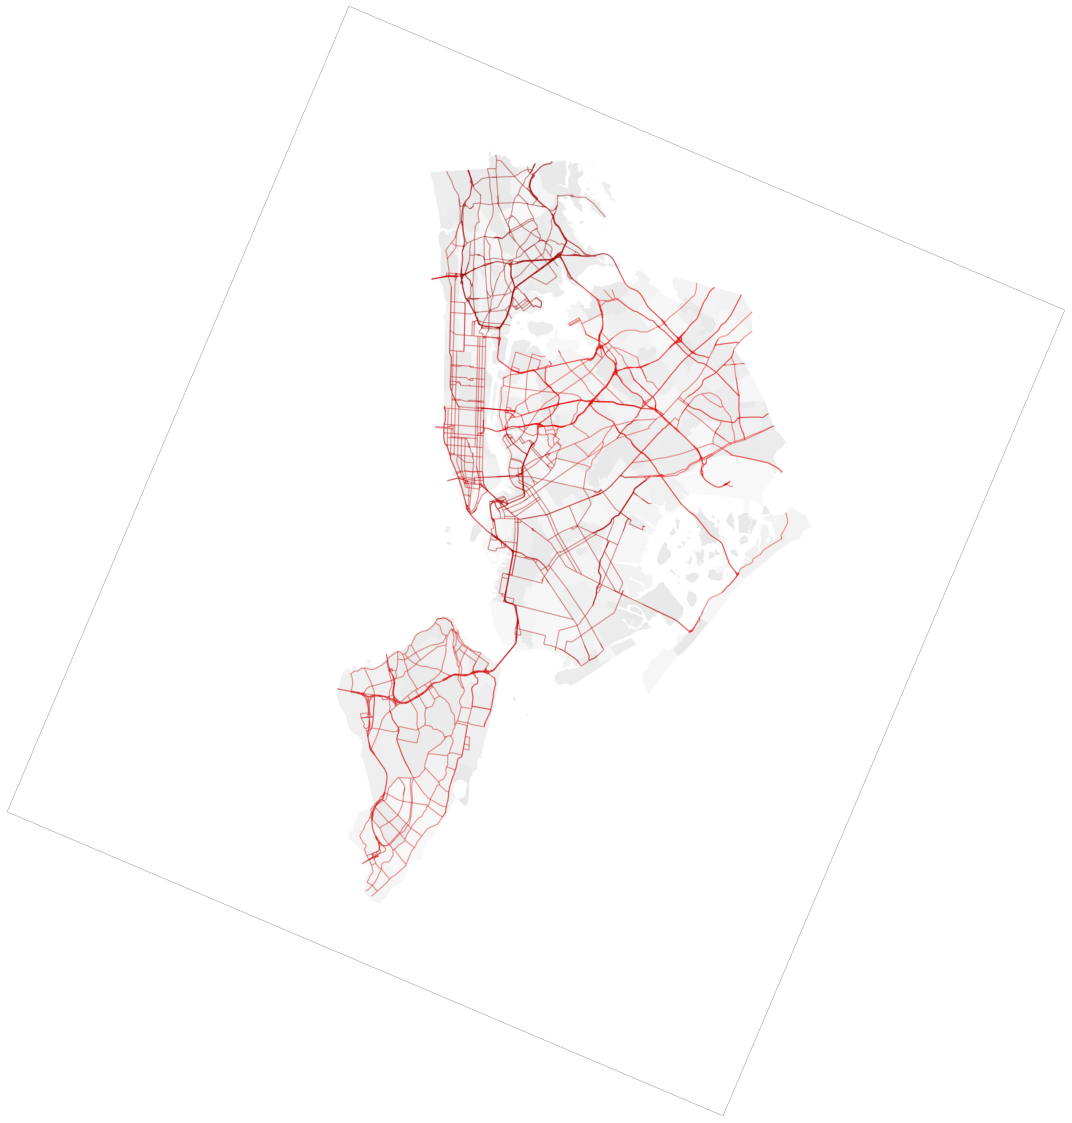

In [21]:
from scipy import ndimage
from matplotlib.patches import Rectangle


fig, ax = plt.subplots(figsize = (18,16)) 

fig.tight_layout()
# Define the CartoPy CRS object.
crs_ep_ar = ccrs.AlbersEqualArea()

crs_proj4 = crs_ep_ar.proj4_init

df_eq_ar_shp = shpNTA.to_crs(crs_proj4)
df_eq_ar_roads = roads.to_crs(crs_proj4)

df_eq_ar_shp.plot(ax=ax, cmap=grays, column='ntaname', legend=False, alpha=1,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
df_eq_ar_roads.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
plt.axis('off')

# plt.set_facecolor("#cf2329")
plt.savefig('Truck_Routes_NYC_equal_area.png', dpi=200)
img = plt.imread('Truck_Routes_NYC_equal_area.png')
rotated_img = ndimage.rotate(img, 67)
plt.imshow(rotated_img)
plt.show()

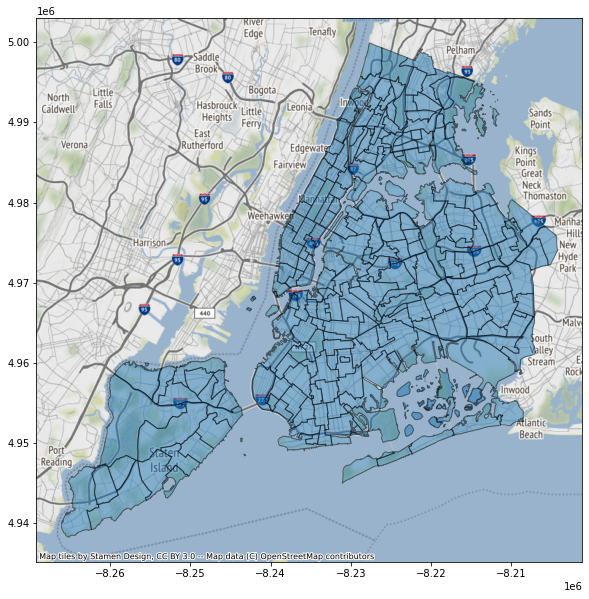

In [14]:
import contextily as ctx

dv = shpNTA.to_crs(epsg=3857)
ax = dv.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

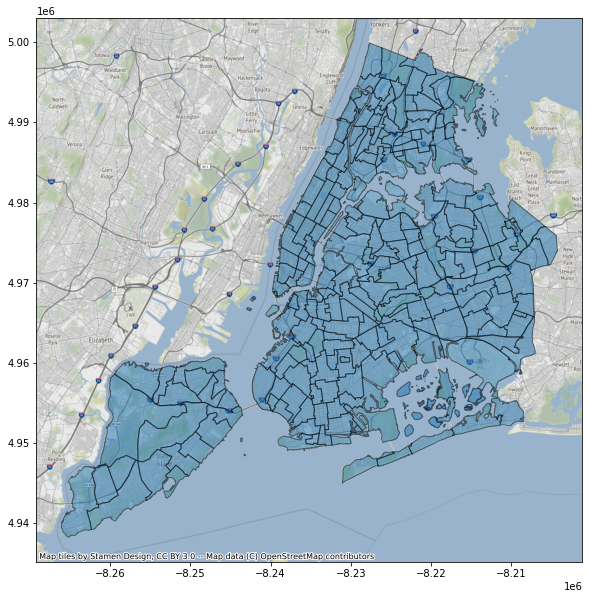

In [15]:
ax = dv.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

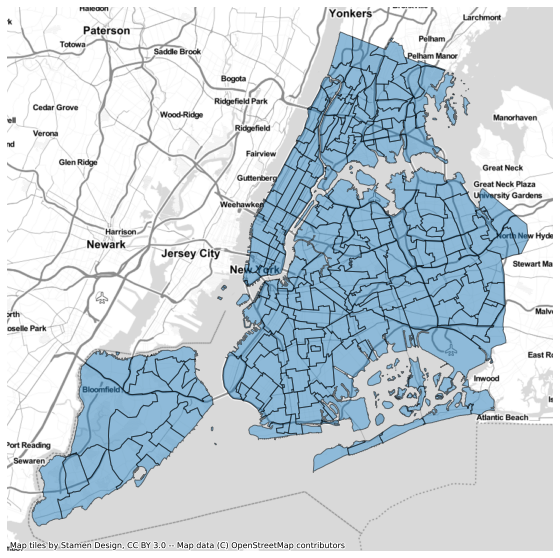

In [16]:
ax = dv.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

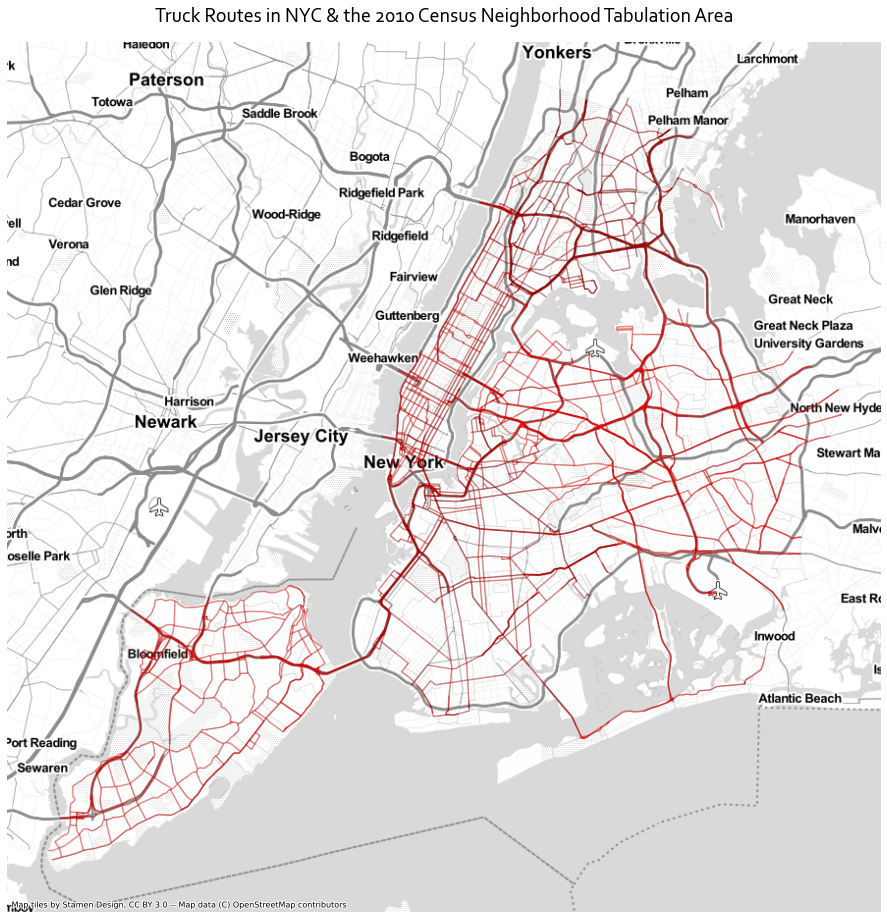

In [25]:
fig, ax = plt.subplots(figsize = (18,16)) 
dr = roads.to_crs(epsg=3857)
dv.plot(edgecolor='k', ax=ax, cmap=grays, column='ntaname', legend=False, alpha=0.05,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
dr.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.savefig('Truck_Routes_NYC_with_BaseMap.png', dpi=200)
# fig.savefig('Truck_Routes_NYC.svg', format='svg', dpi=300)
# plt.savefig('Truck_Routes_NYC.eps', format='eps')
plt.show()

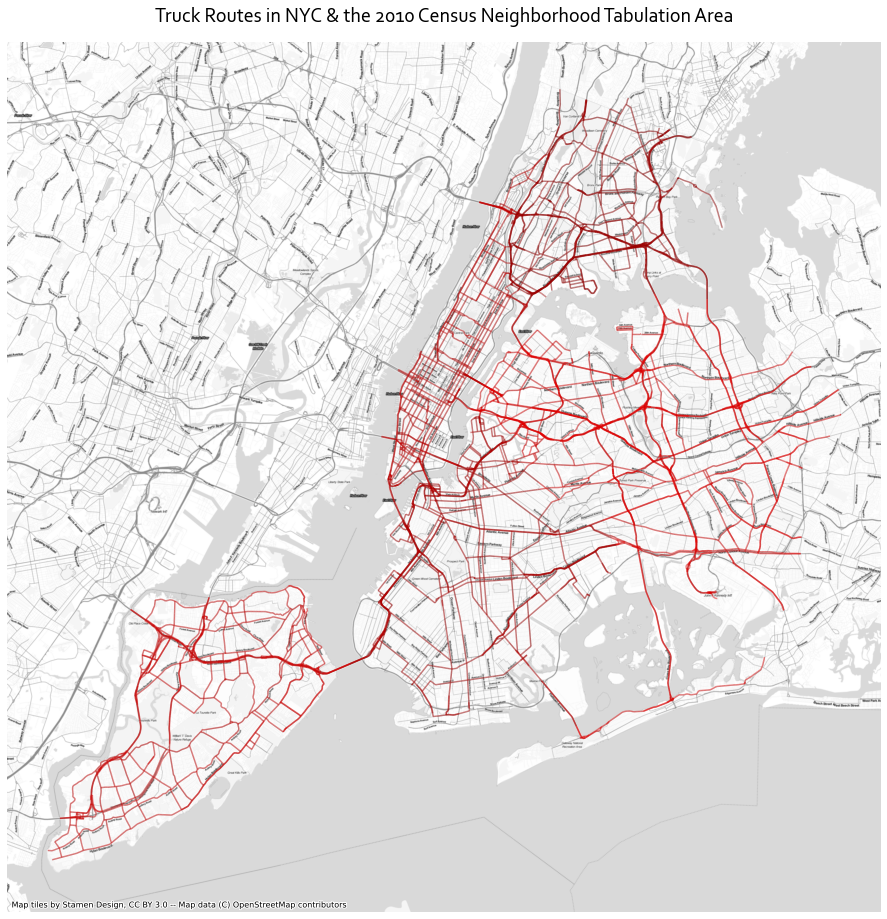

In [18]:
fig, ax = plt.subplots(figsize = (18,16)) 
dr = roads.to_crs(epsg=3857)
dv.plot(edgecolor='k', ax=ax, cmap=grays, column='ntaname', legend=False, alpha=0.05,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
dr.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite, zoom=13)
ax.set_axis_off()

From cffi callback <function _verify_callback at 0x00000252C4C810D8>:
Traceback (most recent call last):
  File "C:\Users\lilyx\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='stamen-tiles-a.a.ssl.fastly.net', port=443): Max retries exceeded with url: /toner-lite/15/9675/12332.png (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

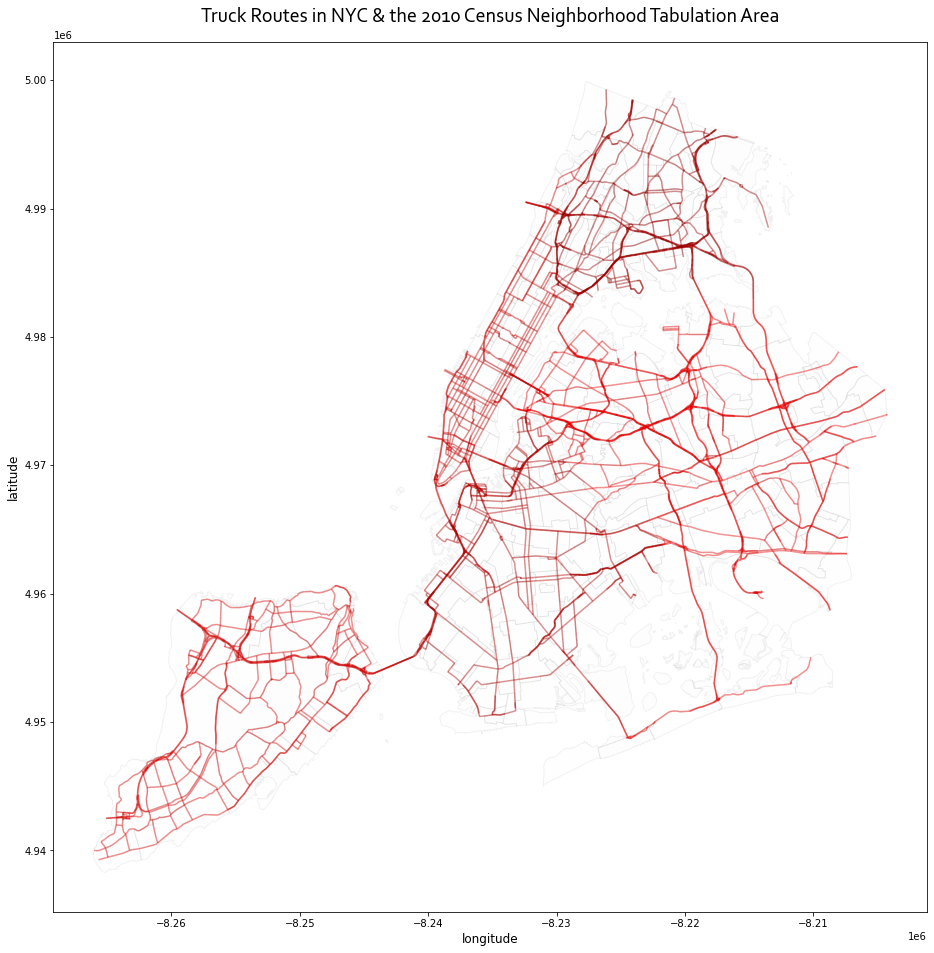

In [19]:
fig, ax = plt.subplots(figsize = (18,16)) 
dr = roads.to_crs(epsg=3857)
dv.plot(edgecolor='k', ax=ax, cmap=grays, column='ntaname', legend=False, alpha=0.05,legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
dr.plot(ax=ax, column=variable, cmap=red_cmap, legend=False, alpha=0.45)
plt.title("Truck Routes in NYC & the 2010 Census Neighborhood Tabulation Area", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=20);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite, zoom=15)
ax.set_axis_off()